# Frekvensmodulasjon - FM

<div class="alert alert-block alert-info">
<b>Anbefalte forkunnskaper:</b> Trigonometriske funksjoner (sinus), python-funksjoner. En fordel, men ikke nødvendig med kjennskap til integralregning.
</div>

Som nevnt i kapittelet om amplitudemodulasjon er frekvensmodulasjon en annen viktig teknikk i radiokommunikasjon for å overføre signaler. Frekvensmodulasjon brukes også for å lage komplekse og interessante lyder i digitale og elektroniske instrumenter. Synthesizeren Yamaha DX7 er kanskje et av de mest definerende instrumentene for 80-tallet, og bak mange av lydene den produserer ligger frekvensmodulasjon. Hør selv her: https://youtu.be/JlAAbvrtYzQ?t=540

La oss se på hvordan frekvensmodulasjon ser og høres ut.

In [1]:
# Evaluer først denne

from startscript import *

%matplotlib inline

[Kilde](https://www.cs.cmu.edu/~music/icm-online/readings/fm-synthesis/fm_synthesis.pdf)

Vi bruker et par parametre for å få til modulasjonen. `C` er frekvensen til bærebølgen (carrier), tenk på det som "grunntonen" som modulasjonen foregår rundt. `D` er dybden, den angir hvor langt fra grunntonen modulasjonen skal gå. `M` er modulasjonsfrekvensen, altså hvor mange ganger per sekund at modulasjonen skal skje. La oss ta et eksempel:

- Bærebølgefrekvens $C = 500$.
- Dybden $D = 100$.
- Modulasjonsfrekvens $M = 2$.

Da vil den resulterende tonen svinge mellom $500 - 100 = 400$ og $500 + 100 = 600$ Hertz. Denne svingningen skjer 2 ganger i sekundet, siden $M = 2$.

Da vi definerte sinus-oscillatoren (generatoren) tidligere brukte vi formelen

$y(t) = A\sin{(2\pi f t)}$

hvor $A$ er amplituden og $f$ er frekvensen til oscillatoren. For å gjøre frekvensmodulasjon, altså at $f$ varierer med tiden $t$, må vi integrere frekvensfunksjonen $f$. Da finner vi den *akkumulerte* fasen for tiden $t$. Vi bruker denne formelen:

$y(t) = A \sin{(\int_{0}^{t} 2\pi f(x)dx)}$

Funksjonen $f(t)$ er definert slik:

$f(t) = C + D\sin{(2\pi M t)}$

Som over er $C$ bærebølgefrekvens, $D$ dybden og $M$ modulasjonsfrekvensen. Setter vi dette inn i formelen for frekvensmodulasjon og regner ut får vi:

$y(t) = A \sin{(\int_{0}^{t} 2\pi f(x)dx)}$

$ = A \sin{(\int_{0}^{t} 2\pi (C + D\sin{(2\pi M t)}) dx)}$

$ = A \sin{(2\pi Ct - D\cos{(2\pi M t)} - \frac{1}{M})}$

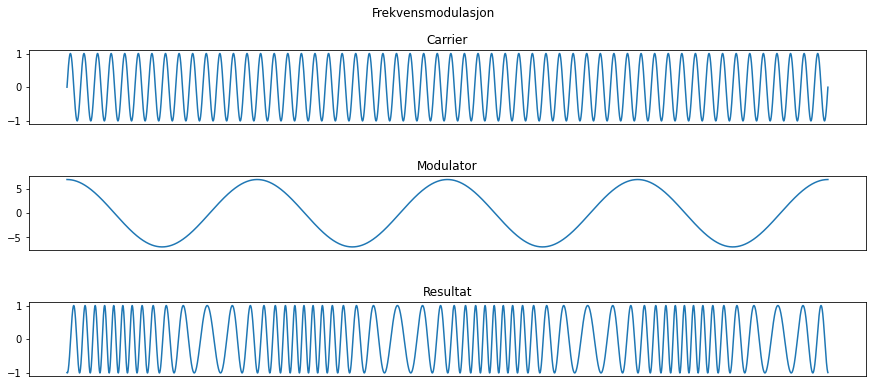

In [2]:
# Frekvensmodulasjon av en sinusbølge. Evaluer for å se graf.

varighet = 4
t = linspace(0.0, varighet, int(varighet * rate))

C = 14
D = 7
M = 1
# Ignorer amplitude, A = 1

# Dette er rett fra formelen over:
frekvensmodulasjon = sin(2*pi*C*t - D*cos(2*pi*M*t) - 1/M)

# ---------------------------------------------
# Kode for å plotte grafer
antall_samples = int(rate * varighet)
carrierwave = sin(2*pi*C*t)
modulatorwave = D*cos(2*pi*M*t)
fig, axs = subplots(3)
fig.suptitle("Frekvensmodulasjon")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)
x = arange(0, antall_samples)
axs[0].set_title("Carrier")
axs[1].set_title("Modulator")
axs[2].set_title("Resultat")
axs[0].plot(x, carrierwave[0:antall_samples])
axs[1].plot(x, modulatorwave[0:antall_samples])
axs[2].plot(x, frekvensmodulasjon[0:antall_samples])
[g.xaxis.set_visible(False) for g in axs]
show()

Hvis vi putter inn verdier slik at frekvensene er i det hørbare registeret kan vi høre modulasjonen:

In [3]:
# Frekvensmodulasjon av en sinusbølge. Evaluer for å høre modulasjon.
varighet = 4
t = linspace(0.0, varighet, int(varighet * rate))

C = 500
D = 100
M = 2
# Ignorer amplitude, A = 1
frekvensmodulasjon = sin(2*pi*C*t - D*cos(2*pi*M*t) - 1/M)

spill_av(frekvensmodulasjon)

Her hører vi at tonen svinger opp og ned i en vibrato. Denne svingningen skjer mellom 400Hz og 600Hz. Ser du sammenhengen med variablene?

Hva med:
`C` $-$ `D` $ = 400$ og `C` $+$ `D` $ = 600$

Og kanskje hører du at modulasjonen skjer `M`, altså to ganger per sekund?

Faseforskyvninger vil sjelden påvirke hvordan vi oppfatter lyden til et enkelt signal. Hvis vi ignorerer fasen kan vi forenkle formelen:

$y(t) = A \sin{(2\pi Ct + D\sin{(2\pi M t)})}$

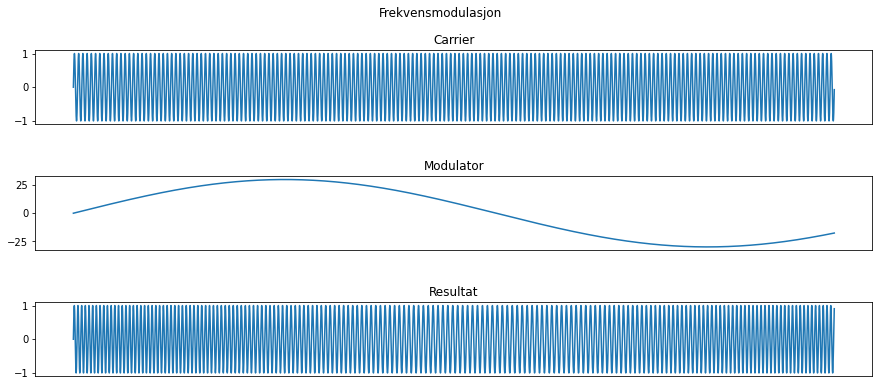

In [7]:
# Frekvensmodulasjon av en sinusbølge. Evaluer for å høre.
varighet = 4
t = linspace(0.0, varighet, int(varighet * rate))

C = 600    # Carrier (bærebølge-frekvens)
D = 30     # Depth (modulasjonsdybde)
M = 3      # Modulasjonsfrekvens

# Forenklet formel (lar A = 1):
frekvensmodulasjon = sin(2*pi*C*t + D*sin(2*pi*M*t))


spill_av(frekvensmodulasjon)



# ---------------------------------------------
# Kode for å plotte grafer
antall_samples = int(rate * 0.3)
carrierwave = sin(2 * pi * C * t)  # Brukes kun til plottingen
modulatorwave = D*sin(2*pi*M*t)
fig, axs = subplots(3)
fig.suptitle("Frekvensmodulasjon")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)
x = arange(0, antall_samples)
axs[0].set_title("Carrier")
axs[1].set_title("Modulator")
axs[2].set_title("Resultat")
axs[0].plot(x, carrierwave[0:antall_samples])
axs[1].plot(x, modulatorwave[0:antall_samples])
axs[2].plot(x, frekvensmodulasjon[0:antall_samples])
[g.xaxis.set_visible(False) for g in axs]
show()

Effekten av en langsom frekvensmodulasjon (når $M < 20$) er at tonen "svinger" opp og ned. I musikk kaller man dette for en *vibrato*.

## Prøv selv

Bruk koden under og test. Forsøk å endre på C, D og M hver for seg mellom hver gang. Hør og se hvordan det påvirker resultatet.

- Prøv med både store og små D (fra 1 og opptil nesten lik C), to-tre forskjellige verdier.
- Prøv med både store og små M (fra mindre enn null til større enn C), to-tre forskjellige verdier.

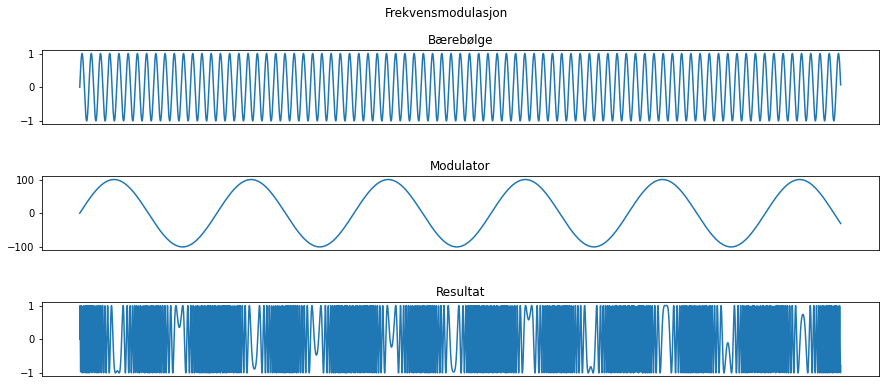

In [8]:
## Frekvensmodulasjon av en sinusbølge
varighet = 4
t = linspace(0.0, varighet, int(varighet * rate))

C = 550    # Carrier (bærebølge-frekvens)  - Endre på denne (må være en hørbar frekvens, eks. 50-15000)
D = 100    # Depth (modulasjonsdybde)      - Tonen oscillerer mellom C - D og C + D
M = 37     # Modulasjonsfrekvens           - Modulasjonen skjer M ganger i sekundet.

frekvensmodulasjon = sin(2*pi*C*t + D*sin(2*pi*M*t))

spill_av(frekvensmodulasjon)



# ---------------------------------------------
vis_antall_sekunder = 0.15          # Vis 0.15 sekunder av signalet
antall_samples = int(rate * vis_antall_sekunder)
carrierwave = sin(2 * pi * C * t)  # Brukes kun til plottingen
modulatorwave = D*sin(2*pi*M*t)
fig, axs = subplots(3)
fig.suptitle("Frekvensmodulasjon")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)
x = arange(0, antall_samples)
axs[0].set_title("Bærebølge")
axs[1].set_title("Modulator")
axs[2].set_title("Resultat")
axs[0].plot(x, carrierwave[0:antall_samples])
axs[1].plot(x, modulatorwave[0:antall_samples])
axs[2].plot(x, frekvensmodulasjon[0:antall_samples])
[g.xaxis.set_visible(False) for g in axs]
show()